Proyecto: Modelo de Riesgo Crediticio
---------------------------------------

**Objetivo**: Construir un modelo de regresión logística que clasifique si un cliente representa un riesgo de crédito. (SOLO EDUCATIVO)

**Herramientas**: Python, pandas, scikit-learn, seaborn, matplotlib.

_by JLES_


In [53]:
# Librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [54]:
# Cargar dataset
df = pd.read_csv('german_credit_data.csv')  
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


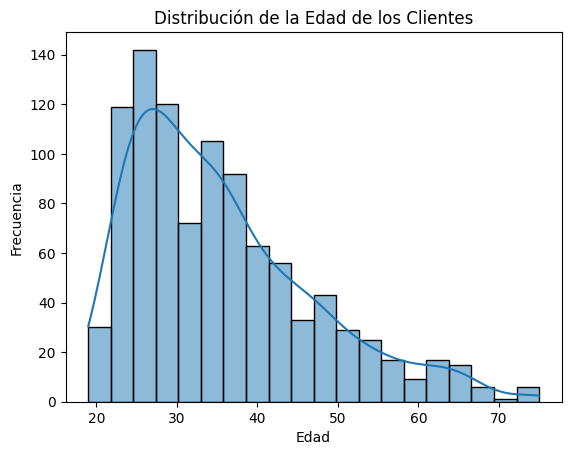

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Distribución de la Edad de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


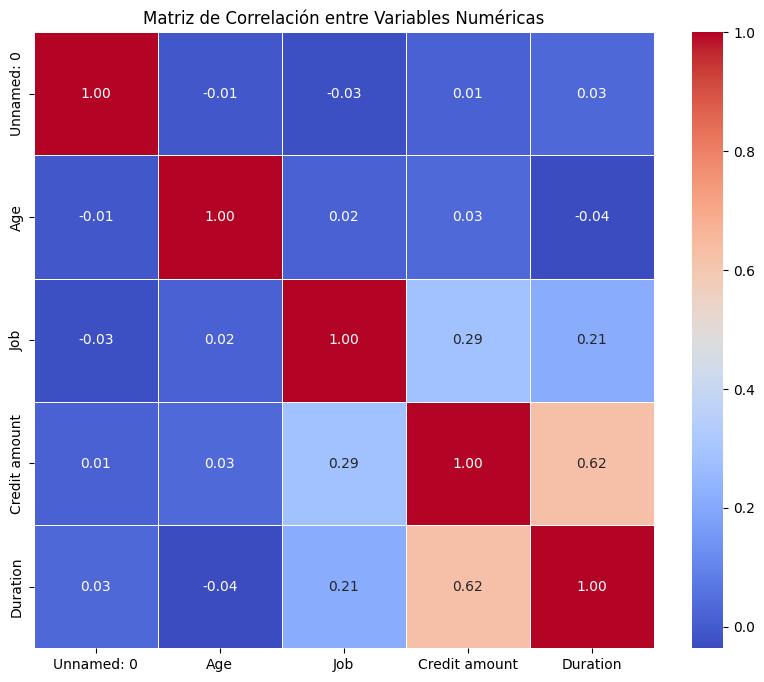

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()


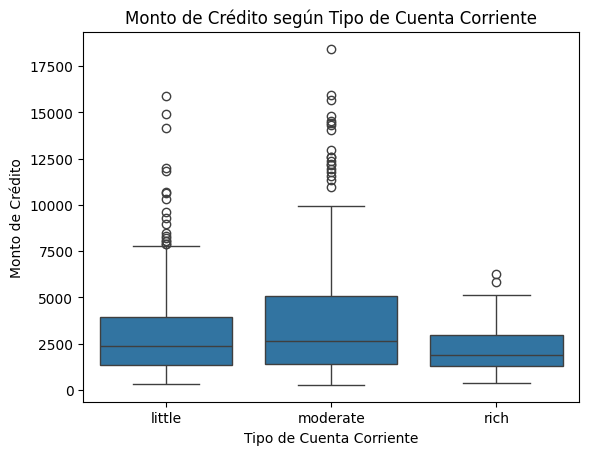

In [59]:
sns.boxplot(x='Checking account', y='Credit amount', data=df)
plt.title('Monto de Crédito según Tipo de Cuenta Corriente')
plt.xlabel('Tipo de Cuenta Corriente')
plt.ylabel('Monto de Crédito')
plt.show()


In [60]:
def detectar_valores_vacios(df):
    import numpy as np

    sospechosos = ["", " ", "none", "null", "-", "n/a", "na", "sin datos", "nan"]

    resultados = {}
    for col in df.columns:
        valores = df[col].astype(str).str.lower().str.strip()
        cuenta_sospechosos = valores.isin(sospechosos).sum()
        cuenta_nulos = df[col].isna().sum()
        total = cuenta_sospechosos + cuenta_nulos

        if total > 0:
            resultados[col] = {
                "nulos (NaN)": cuenta_nulos,
                "sospechosos (texto)": cuenta_sospechosos,
                "total vacíos": total
            }

    return resultados


In [61]:
vacíos = detectar_valores_vacios(df)
print(vacíos)


{'Saving accounts': {'nulos (NaN)': 183, 'sospechosos (texto)': 183, 'total vacíos': 366}, 'Checking account': {'nulos (NaN)': 394, 'sospechosos (texto)': 394, 'total vacíos': 788}}


In [62]:
df['Saving accounts'] = df['Saving accounts'].replace(["", " ", "-", "n/a", "na", "null", "none"], np.nan)
df['Saving accounts'].fillna(df['Saving accounts'].mode()[0])

df['Checking account'] = df['Checking account'].replace(["", " ", "-", "n/a", "na", "null", "none"], np.nan)
df['Checking account'].fillna(df['Checking account'].mode()[0])




0        little
1      moderate
2        little
3        little
4        little
         ...   
995      little
996      little
997      little
998      little
999    moderate
Name: Checking account, Length: 1000, dtype: object

In [63]:
tipo_de_datos = df.dtypes
print(tipo_de_datos)

Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object


In [64]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Codificación de las columnas categóricas
df['Sex'] = le.fit_transform(df['Sex'])  # 0 = male, 1 = female
df['Housing'] = le.fit_transform(df['Housing'])  # 0 = own, 1 = rent, 2 = free


In [65]:
# Codificación One-Hot para variables categóricas nominales
df = pd.get_dummies(df, columns=['Saving accounts', 'Checking account', 'Purpose'])


In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Seleccionamos las columnas numéricas
numerical_cols = ['Age', 'Job', 'Credit amount', 'Duration']

# Estandarizamos las columnas numéricas
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [68]:
#tipo_de_datos = df.dtypes
#print(tipo_de_datos)

In [69]:
#df.columns


In [70]:
# Crear variable aleatoria artificial (solo práctica)
np.random.seed(42)
df['default'] = np.random.choice([0, 1], size=len(df), p=[0.7, 0.3])


In [71]:
print(df['default'].value_counts())


default
0    712
1    288
Name: count, dtype: int64


In [72]:
from sklearn.model_selection import train_test_split

# Definir la variable objetivo 'default' y las variables predictoras
X = df.drop('default', axis=1)  # Asumiendo que 'default' es la columna objetivo
y = df['default']

# Dividir en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Modelo**

In [73]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo de regresión logística
modelo = LogisticRegression(max_iter=1000)

# Entrenar el modelo
modelo.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [74]:
from sklearn.metrics import classification_report, confusion_matrix

# Hacer predicciones
y_pred = modelo.predict(X_test)

# Matriz de confusión
print(confusion_matrix(y_test, y_pred))

# Reporte de clasificación
print(classification_report(y_test, y_pred))


[[148   0]
 [ 50   2]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       148
           1       1.00      0.04      0.07        52

    accuracy                           0.75       200
   macro avg       0.87      0.52      0.46       200
weighted avg       0.81      0.75      0.65       200



Distribución de la variable objetivo (default)
--------------------------------------------------

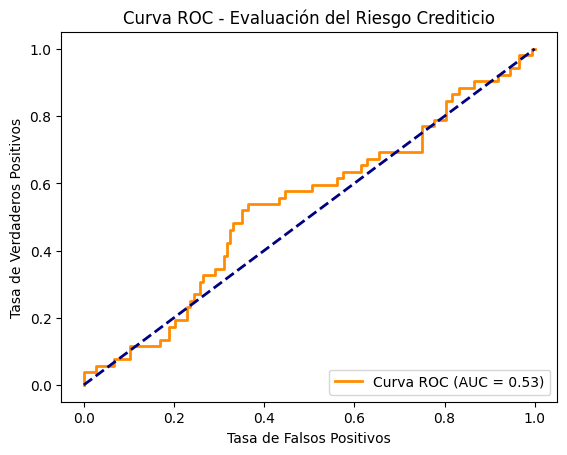

In [75]:
from sklearn.metrics import roc_curve, auc

# Calcular probabilidades predichas
y_pred_prob = modelo.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Graficar
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Evaluación del Riesgo Crediticio')
plt.legend(loc='lower right')
plt.show()


**ESTE PROYECTO SOLO ES EDUCACIONAL. LOS RESULTADOS SON ARTIFICIALES YA QUE SE CREO LA VARIABLE DEFAULT QUE EXPLICA EL RIESGO CREDITICIO CON VALORES ALEATORIOS.**